In [1]:
import sys
sys.path.append('../src/')

In [2]:
# Third-party libraries:
import numpy as np
from sklearn.datasets import load_iris
# My libraries:
import dataset.dataset as dtset
from dbclass.dbclass import DBCLASS
from dbclass import dbclass_utils as db_utils

In [3]:
# import some data to play with
ds = load_iris()
# Splitting the data for trainning and for test:
ds_train, ds_validation = dtset.split_data(ds, prop_train=0.5)
ds_validation, ds_test = dtset.split_data(ds_validation, prop_train=0.5)

0% concluído...
0% concluído...
10% concluído...
20% concluído...
30% concluído...
40% concluído...
50% concluído...
60% concluído...
70% concluído...
80% concluído...
90% concluído...


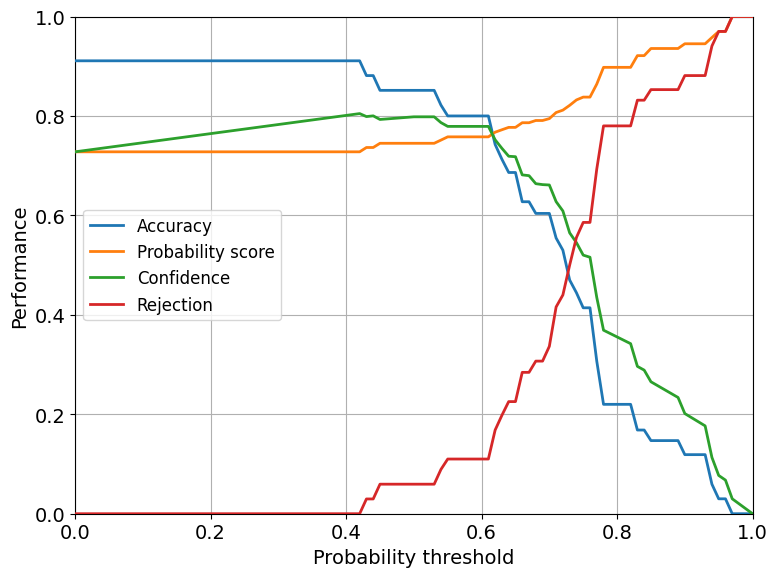


Best probability threshold value: 0.42
accuracy 0.910891
prob_score 0.727848
rejection 0
confidence 0.804726


In [4]:
# Trainning the model using cross validation in the trainning dataset:
dbclass = DBCLASS()
prob_thold_list = np.append(np.arange(0, 1, 0.01), 0.999)
best_prob_thold, class_metrics = db_utils.cross_validation_trainning(dbclass, ds_train, ds_validation, prob_thold_list)
print("\nBest probability threshold value:", best_prob_thold)
for metric in class_metrics.keys():
    print(metric, class_metrics[metric])

              precision    recall  f1-score   support

      setosa       0.81      1.00      0.90        13
  versicolor       0.69      0.85      0.76        13
   virginica       0.72      1.00      0.84        13
     Unknown       0.75      0.32      0.44        19

    accuracy                           0.74        58
   macro avg       0.74      0.79      0.73        58
weighted avg       0.74      0.74      0.70        58


Confusion matrix:


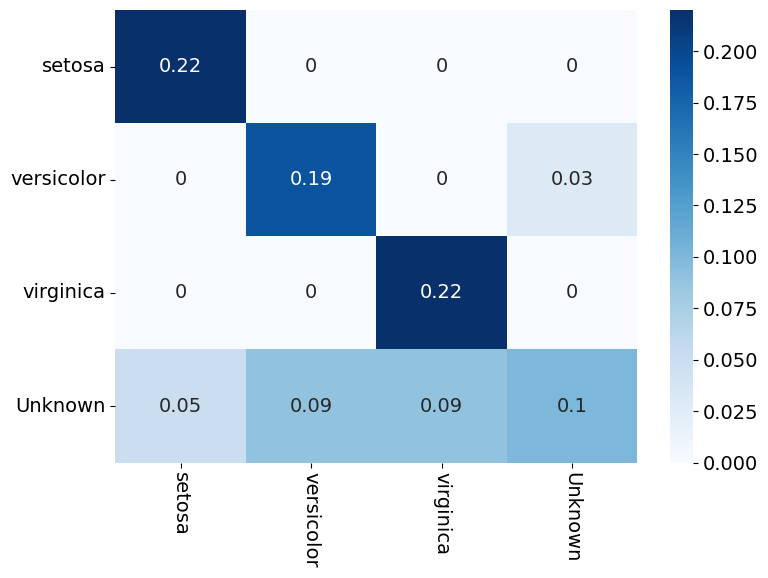


Index and Target label:
Index: 0 Label: setosa
Index: 1 Label: versicolor
Index: 2 Label: virginica

Probability score threshold: 0.42
accuracy 0.737374
prob_score 0.736062
rejection 0.131313
confidence 0.736613


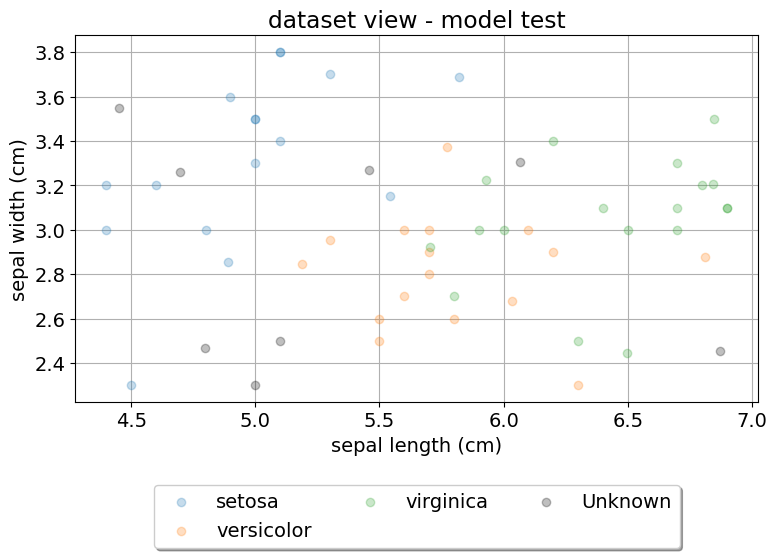

In [5]:
# Once the best probability score threshold is found, the classifier is
# configured with the best settings:
dbclass = DBCLASS(prob_thold=best_prob_thold)
ds_model = dtset.join_data((ds_train, ds_validation))
dbclass.fit(ds_model['data'], ds_model['target'], target_names=ds_model['target_names'])
ds_test = dtset.insert_rand_noclass(ds_test)
db_utils.dbclass_model_test(dbclass, ds_test)